# Setup

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports 
import numpy as np

#print(np.__version__) #print numpy version, e.g., 1.21.5
#to upgrade: pip install --upgrade numpy

import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "burlea_catalina_a2"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Get the data

In [2]:
import pandas as pd
#print(pd.__version__) #print pandas version, e.g., 0.24.2
#to upgrade: pip install --upgrade pandas
CONFLICTS_PATH = os.path.join("datasets", "conflicts")
def load_conflicts_data(conflicts_path=CONFLICTS_PATH):
    csv_path = os.path.join(conflicts_path, "MergeConflictsDataset.csv")
    return pd.read_csv(csv_path, sep = ';')

Load the CSV into Pandas and make it return a Pandas DataFrame of our software conflicts dataset.
(info about the commits)

In [3]:
conflicts = load_conflicts_data()
conflicts.head()

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
0,efc0bcd1d6199448c323549fdc45310750b48c85,fb9f2a65cabba5a924b89a45793914066471b2ab,5ee7c7c750e9ecffaea12f97d5b05b2445e7c007,fb9f2a65cabba5a924b89a45793914066471b2ab,1,5,0,0,1,23,...,0,0,0,0,0,20,65,35.40000,20.0,0
1,287b9b838b6b6b212ef538aa537aef76110ee111,72fd7d81c9c7e28af8740f5a1b210a803290383d,fb9f2a65cabba5a924b89a45793914066471b2ab,a18c1088c892f1e6ed4b7d541e68b2e4b039a42e,0,1166,11267,1,2,371,...,0,0,0,0,0,31,117,58.56383,53.5,1
2,e7478680c0db825239ea9628967728c8577bb5c2,36977963caa2896ad9a4a92b2bdcd85189beccb1,bc230857adc3a9763bc7d89793d826463c857c00,36977963caa2896ad9a4a92b2bdcd85189beccb1,1,0,0,0,1,22,...,0,0,0,0,0,18,18,18.00000,18.0,0
3,0c65b30a8fd3a7db40163fcb9b0004cb7487c0ff,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,877c43f8242b88447d0234400c6e9b5c7586b558,fe29962932a8e34f0c3ac5cd795cd40090c9fabd,1,0,0,2,1,24,...,0,0,0,0,0,22,63,38.80000,31.0,0
4,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,7899f565d3461ed287e61662c8d399aafcac9e42,5e68e04e310c4f57a19d4cfa6be1e0ba3a8801d6,236b85af833398e0f07d08b7d7a25734d8c1b11d,0,0,0,1,2,2,...,0,0,0,0,0,31,56,43.50000,43.5,1


In [4]:
conflicts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26973 entries, 0 to 26972
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   commit           26973 non-null  object 
 1   parent1          26973 non-null  object 
 2   parent2          26973 non-null  object 
 3   ancestor         26972 non-null  object 
 4   is pr            26973 non-null  int64  
 5   added lines      26973 non-null  int64  
 6   deleted lines    26973 non-null  int64  
 7   devs parent1     26973 non-null  int64  
 8   devs parent2     26973 non-null  int64  
 9   time             26973 non-null  int64  
 10  nr files         26973 non-null  int64  
 11  added files      26973 non-null  int64  
 12  deleted files    26973 non-null  int64  
 13  renamed files    26973 non-null  int64  
 14  copied files     26973 non-null  int64  
 15  modified files   26973 non-null  int64  
 16  nr commits1      26973 non-null  int64  
 17  nr commits2 

In [5]:
# Get numerical and categorical columns
numerical_columns = conflicts.drop('conflict', axis = 1).select_dtypes(include=['number']).columns
categorical_columns = conflicts.select_dtypes(include=['object']).columns

In [6]:
categorical_columns

Index(['commit', 'parent1', 'parent2', 'ancestor'], dtype='object')

In [7]:
numerical_columns

Index(['is pr', 'added lines', 'deleted lines', 'devs parent1', 'devs parent2',
       'time', 'nr files', 'added files', 'deleted files', 'renamed files',
       'copied files', 'modified files', 'nr commits1', 'nr commits2',
       'density1', 'density2', 'fix', 'bug', 'feature', 'improve', 'document',
       'refactor', 'update', 'add', 'remove', 'use', 'delete', 'change',
       'messages_min', 'messages_max', 'messages_mean', 'messages_median'],
      dtype='object')

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np


# get the right column indices: safer than hard-coding indices 
nr_commits1_ix, nr_commits2_ix, devs_parent1_ix, devs_parent2_ix, added_files_ix= [
    list(conflicts.columns).index(col)
    for col in ("nr commits1", "nr commits2", "devs parent1", "devs parent2", "added files")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_files_per_commit=True):
        self.add_files_per_commit = add_files_per_commit
        
    def fit(self, X, y=None):
        return self  # Nothing else to do
    
    def transform(self, X, y=None):
       # Compute additional attributes
        nr_commits_per_developer_on_branch1 = np.zeros_like(X[:, nr_commits1_ix])
        nr_commits_per_developer_on_branch2 = np.zeros_like(X[:, nr_commits2_ix])
        
        # Avoid division by zero
        mask1 = X[:, devs_parent1_ix] != 0
        mask2 = X[:, devs_parent2_ix] != 0
        
        nr_commits_per_developer_on_branch1[mask1] = X[mask1, nr_commits1_ix] / X[mask1, devs_parent1_ix]
        nr_commits_per_developer_on_branch2[mask2] = X[mask2, nr_commits2_ix] / X[mask2, devs_parent2_ix]
        
        if self.add_files_per_commit:
             # Check if denominator is not zero before division
            denominator_mask = (X[:, nr_commits1_ix] + X[:, nr_commits2_ix]) != 0
            files_per_commit = np.zeros_like(X[:, added_files_ix])
            files_per_commit[denominator_mask] = X[denominator_mask, added_files_ix] / (X[denominator_mask, nr_commits1_ix] + X[denominator_mask, nr_commits2_ix])
            return np.c_[X, nr_commits_per_developer_on_branch1, nr_commits_per_developer_on_branch2, files_per_commit]
        return  np.c_[X, nr_commits_per_developer_on_branch1, nr_commits_per_developer_on_branch2]

# Usage example:
# Create an instance of the CombinedAttributesAdder transformer
attr_adder = CombinedAttributesAdder(add_files_per_commit=True)

# Apply the transformer to the commits DataFrame
conflicts_extra_attribs = attr_adder.transform(conflicts.values)

In [9]:
from sklearn.preprocessing import FunctionTransformer

def add_extra_features(X, add_files_per_commit=True):
    # Compute additional attributes
    nr_commits_per_developer_on_branch1 = np.zeros_like(X[:, nr_commits1_ix])
    nr_commits_per_developer_on_branch2 = np.zeros_like(X[:, nr_commits2_ix])
    
    # Avoid division by zero
    mask1 = X[:, devs_parent1_ix] != 0
    mask2 = X[:, devs_parent2_ix] != 0
    
    nr_commits_per_developer_on_branch1[mask1] = X[mask1, nr_commits1_ix] / X[mask1, devs_parent1_ix]
    nr_commits_per_developer_on_branch2[mask2] = X[mask2, nr_commits2_ix] / X[mask2, devs_parent2_ix]
    if add_files_per_commit:
         # Check if denominator is not zero before division
        denominator_mask = (X[:, nr_commits1_ix] + X[:, nr_commits2_ix]) != 0
        files_per_commit = np.zeros_like(X[:, added_files_ix])
        files_per_commit[denominator_mask] = X[denominator_mask, added_files_ix] / (X[denominator_mask, nr_commits1_ix] + X[denominator_mask, nr_commits2_ix])
        return np.c_[X, nr_commits_per_developer_on_branch1, nr_commits_per_developer_on_branch2,
                     files_per_commit]
    else:
        return np.c_[X, nr_commits_per_developer_on_branch1, nr_commits_per_developer_on_branch2]

attr_adder = FunctionTransformer(add_extra_features, validate=False,
                                 kw_args={"add_files_per_commit": False})
conflicts_extra_attribs = attr_adder.fit_transform(conflicts.values)

In [10]:
import numpy as np
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy="median")
conflicts_num = conflicts.select_dtypes(include=[np.number])

# Identify problematic values
print(np.isinf(conflicts_num).any())
print(np.nanmax(conflicts_num))

# Preprocess the data
# For example, replace infinite values with NaN
conflicts_num.replace([np.inf, -np.inf], np.nan, inplace=True)
# Or clip extreme values
conflicts_num = conflicts_num.clip(lower=-1e9, upper=1e9)  # Adjust the bounds as needed

# Now proceed with imputation
imputer.fit(conflicts_num)

is pr              False
added lines        False
deleted lines      False
devs parent1       False
devs parent2       False
time               False
nr files           False
added files        False
deleted files      False
renamed files      False
copied files       False
modified files     False
nr commits1        False
nr commits2        False
density1           False
density2           False
fix                False
bug                False
feature            False
improve            False
document           False
refactor           False
update             False
add                False
remove             False
use                False
delete             False
change             False
messages_min       False
messages_max       False
messages_mean      False
messages_median    False
conflict           False
dtype: bool
1140945.0


SimpleImputer(strategy='median')

Integrating StandardScaler within a pipeline ensures that the transformation is applied consistently during both training and testing. This helps avoid data leakage and ensures that the preprocessing steps are part of the model evaluation process, improving the reproducibility and robustness of the model.

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])

conflicts_num_tr = num_pipeline.fit_transform(conflicts_num)

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


conflicts_num = conflicts.select_dtypes(include=[np.number])
conflicts_cat = conflicts.select_dtypes(include=[object])
num_attribs = list(conflicts_num)
cat_attribs = ["commit", "parent1", "parent2", "ancestor"] 

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_attribs),
    ])

conflicts_prepared = full_pipeline.fit_transform(conflicts)


In [14]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = conflicts_prepared
y = conflicts['conflict'].values

# Convert target to float32
y = y.astype('float32')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=23)

# Ensure all data is of type float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Check the data types
print(f"X_train dtype: {X_train.dtype}, y_train dtype: {y_train.dtype}")
print(f"X_test dtype: {X_test.dtype}, y_test dtype: {y_test.dtype}")

X_train dtype: float32, y_train dtype: float32
X_test dtype: float32, y_test dtype: float32


# Define a Model

## Sequential Model 
- **tf.keras.Sequential class** is a **linear stack of layers**. 
- This means that **each layer in the model has exactly one input tensor and one output tensor**.

### Architecture of the model
The model consists of 
- two hidden layers with ReLU activation functions and with 128 and 64 neurons, each followed by a dropout layer for regularization, 
- an output layer with a sigmoid activation function for binary classification.

The output layer produces a single output representing the probability of the positive class in binary classification.

**Explanation for every layer**

1.  **Input layer**
    - defines the shape of the input data.
    - `shape=(X_train.shape[1],)`: The input shape is defined by the number of features in the training data X_train. `X_train.shape[1]` gives the number of features (columns) in the input data.

2.  **Dense layer** 
    - `Dense(128):` This is a fully connected (dense) layer with 128 neurons.
    -  Activation function: **relu'**
        - The Rectified Linear Unit (ReLU) activation function 
        -  non-linear activation function that introduces non-linearity to the model, allowing it to learn complex patterns in the data.
        -  helps in dealing with the vanishing gradient problem and allows the model to learn complex patterns

3.  **Dropout layer**
    - **Dropout** is a *regularization technique used to prevent overfitting in neural networks*. 
    - It randomly drops a fraction of the input units during training. 
    - Here, 0.5 indicates that 50% of the input units will be dropped randomly during training.

4.  **Hidden Layer (Dense)**:
    - Another fully connected layer with 64 neurons.
    - Activation function: **relu'**
    - This layer captures additional patterns in the data, transforming the input from the previous layer into a representation that is potentially more informative for the task.

5. **Dropout Layer**:
    - Similar to the previous dropout layer, it helps prevent overfitting by randomly dropping 50% of the input units during training.

6. **Output Layer (Dense)**:
    - This is the final layer of the neural network.
    - It has a single neuron, which is typical for binary classification tasks.
    - Activation function: **'sigmoid'(). 
        - Sigmoid activation function squashes the output values between 0 and 1, which is suitable for binary classification where we want the output to represent the probability of the positive class.



In [15]:

# Define the model
import tensorflow as tf


model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/Users/maria-catalinaburlea/Documents/Facultate/AN 3/SEM_II/Intelligent_Systems(IS)/LAB/ASSIGNMENTS/A2/Burlea Catalina/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# Add Optimizer, Loss, and Metric

model.compile(optimizer, loss, metrics) - configures the model for training by specifying the optimizer, loss function, and metrics to be used during training and evaluation. 
- **optimizer**:
    - The optimizer is responsible for updating the weights of the neural network during training in order to minimize the loss function.
    - 'adam' is one of the most commonly used optimization algorithms in deep learning. It is an adaptive learning rate optimization algorithm that combines the advantages of AdaGrad and RMSProp.
   - Adam adapts the learning rate for each parameter, allowing the model to converge quickly and efficiently.
- **loss**:
    - The loss function measures **how well the model's predictions match the true labels during training**.
    - quantifies the difference between the predicted outputs of a machine learning algorithm and the actual target values.
    - 'binary_crossentropy' is a commonly used loss function for binary classification problems.
    - It calculates the cross-entropy loss between 
        - the true labels and 
        - the predicted probabilities for binary classification tasks.
    - Cross-entropy measures the difference between two probability distributions, in this case, the true distribution of the labels and the predicted distribution.

- **recall**:
    - Metrics are used to evaluate the performance of the model during training and testing.
    - model's ability to correctly identify positive samples out of all actual positive samples
    - useful in scenarios where the cost of false negatives (missing a positive case) is high, such as medical diagnoses or anomaly detection.

In [16]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.Recall(), 'accuracy']
)


I include early stopping in training through a callback. 

**Callback**
- **A callback is just a function you want run every so often while the network trains**. 

**Early stopping callback**
- The early stopping callback will run after every epoch. 
- These parameters say: "If there hasn't been at least an improvement of 0.001 in the validation loss over the previous 5 epochs, then stop the training and keep the best model you found." 


- **Patience** (patience=50):
    - *number of epochs with no improvement after which training will be stopped*.
    - In this case, if the model's performance does not improve for 50 consecutive epochs, training will stop.

- **Min Delta** (min_delta=0.001):
    - *minimum change in the monitored metric to qualify as an improvement*.
    - Training will only continue if there is an improvement in the monitored metric greater than min_delta.
    - If the change is less than min_delta, it will not be considered as an improvement.
    - For example, with min_delta=0.001, if the monitored metric improves by less than 0.001, it will not be considered as an improvement.

- **Restore Best Weights**(restore_best_weights=True):
    - **determines whether to restore the weights of the model to the best observed values during training when training is finished**.
    - If set to True, the weights of the model will be restored to the point where the monitored metric was at its best.
    - This is useful because the model may continue training for a few more epochs after the early stopping criterion is met, and we want to retain the best performing model.

In [17]:
import keras

# Define early stopping callback
early_stopping = keras.callbacks.EarlyStopping(
    patience=50,
    min_delta=0.001,
    restore_best_weights=True,
)

# Train and Evaluate

The arguments for model.fit()
- **X_train, y_train**: These are  training features and labels, respectively.

- **validation_split=0.2**: 
    - *the fraction of the training data to be used for validation*. 
    - Here, 20% of the training data will be used for validation.

- **batch_size=512**: 
    - *the number of samples per gradient update*. 
    - It controls how many samples are fed into the model at once during training.

- **epochs=200**: 
    - *the number of epochs (iterations over the entire dataset) for which the model will be trained*.
    -  **Epoch** is the number of passes a training dataset takes around an algorithm.
- **callbacks=[early_stopping]**: T
    -specifies any callbacks to be applied during training. 
    - In this case, I am using early stopping as a callback to monitor the validation loss and stop training if it doesn't improve for a certain number of epochs (as defined by the patience parameter in early_stopping).

In [18]:
# Fit the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

Epoch 1/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9127 - loss: 0.5438 - recall: 0.4154 - val_accuracy: 0.9802 - val_loss: 0.1199 - val_recall: 0.7339
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9859 - loss: 0.0855 - recall: 0.7856 - val_accuracy: 0.9973 - val_loss: 0.0422 - val_recall: 0.9679
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9984 - loss: 0.0228 - recall: 0.9831 - val_accuracy: 0.9983 - val_loss: 0.0264 - val_recall: 0.9817
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9997 - loss: 0.0084 - recall: 0.9978 - val_accuracy: 0.9990 - val_loss: 0.0184 - val_recall: 0.9862
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9994 - loss: 0.0039 - recall: 0.9978 - val_accuracy: 0.9990 - val_loss: 0.0174 - val_recall: 0.9862
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9996 - loss: 0.0030 - recall: 0.9967 - val_accuracy: 0.9990 - val_loss: 0.0178 - val_recall: 0.9862
Epoc

## Evaluation on training set

In [19]:
# Evaluate the model on the training set
train_loss, train_recall, train_accuracy = model.evaluate(X_train, y_train)

print(f"Training Loss: {train_loss:.4f}")
print(f"Training Recall: {train_recall:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")

633/633 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - accuracy: 1.0000 - loss: 4.4977e-04 - recall: 1.0000
Training Loss: 0.0024
Training Recall: 1.0000
Training Accuracy: 1.0000


## Evaluation on testing set

In [20]:
# Evaluate the model on the test set
test_loss, test_recall, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Print the keys in history to check available metrics
print("Available history keys:", history.history.keys())


211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - accuracy: 0.9996 - loss: 0.0107 - recall: 0.9928
Test Loss: 0.0044
Test Recall: 0.9973
Test Accuracy: 0.9999
Available history keys: dict_keys(['accuracy', 'loss', 'recall', 'val_accuracy', 'val_loss', 'val_recall'])


# Conclusion

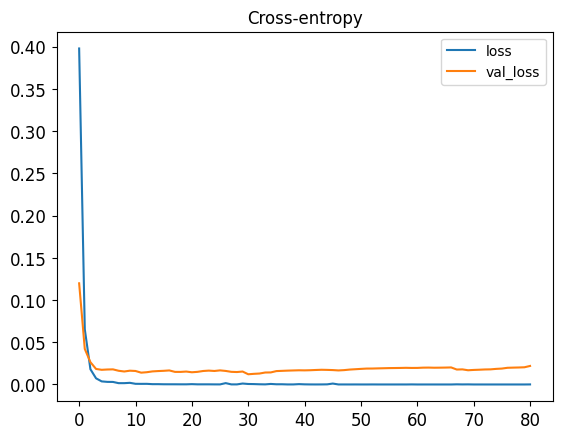

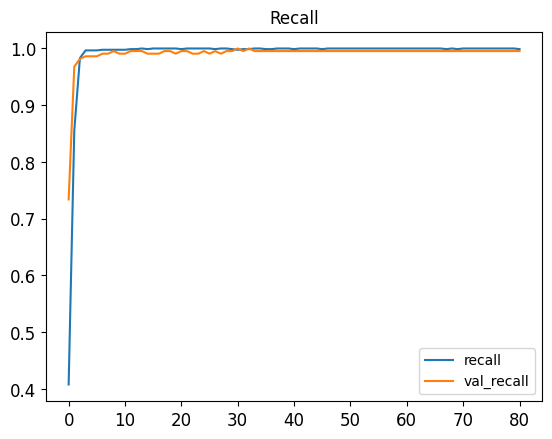

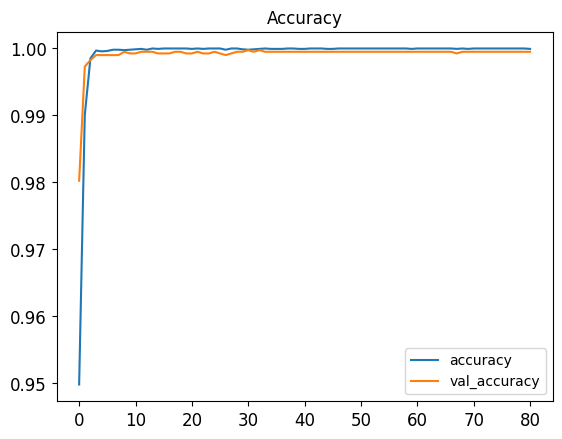

In [22]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['recall', 'val_recall']].plot(title="Recall")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")
plt.show()

As see in graphs we have great model! Without problems like underfitting or overfitting.